# ANALYSE À COMPOSANTE PRINCIPALE (ACP)

Une étude gastronomique a conduit à apprécier le service, la qualité et le prix de quatre restaurants. Pour cela, un expert a noté ces restaurants avec des notes allant de -3 à 3.
Les résultats sont les suivantes

|Restaurant|Service|Qualité|Prix|
|:--------:|:-----:|:-----:|:--:|
|R1|-2|3|-1|
|R2|-1|1|0|
|R3|2|-1|-1|
|R4|1|-3|2|

In [16]:
# importer les methodes du modules sympy
from sympy import *

In [17]:
# for plotting
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

In [18]:
# convertir en matrice
X = Matrix([[-2,3,-1],[-1,1,0],[2,-1,-1],[1,-3,2]])
# afficher la matrice
X

Matrix([
[-2,  3, -1],
[-1,  1,  0],
[ 2, -1, -1],
[ 1, -3,  2]])

La matrice des covariances est 
$$
\mathbf{V}
=
\begin{bmatrix}
\frac{5}{2} & -3 & \frac{1}{2} \\
-3 & 5 & -2 \\
\frac{1}{2} & -2 & \frac{3}{2} 
\end{bmatrix}
$$

In [19]:
# convertir en matrice
V = Matrix([[5/2,-3,1/2],[-3,5,-2],[1/2,-2,3/2]])
# afficher la matrice
V

Matrix([
[2.5, -3, 0.5],
[ -3,  5,  -2],
[0.5, -2, 1.5]])

et celles des corrélations (aux erreurs d'arrondi près)
$$
\mathbf{R}
=
\begin{bmatrix}
1 & -0.85 & 0.26 \\
-0.85 & 1 & -0.73 \\
0.26 & -0.73 & 1 
\end{bmatrix}
$$

In [20]:
# convertir en matrice
R = Matrix([[1,-0.85,0.26],[-0.85,1,-0.73],[0.26,-0.73,1]])
# afficher la matrice
R

Matrix([
[    1, -0.85,  0.26],
[-0.85,     1, -0.73],
[ 0.26, -0.73,     1]])

Pour l'étude, on effectuera une ACP centrée avec des poids équirépartis.

1. Etude des valeurs propres

    a. Vérifions simplement que V admet une valeur propre $\lambda_3$ = 0

In [21]:
# il suffit de monter que le déterminant polynôme caractéristique rattaché a V est égale á 0
L3 = 0
P = V - L3*eye(V.rows)
print("L3 = {} est belle et bien une valeur propre de V car det(V-L3I) = {}".format(L3,P.det())) if P.det() == 0 else print("L3 = {} n'est pas une valeur propre de V car det(V-L3I) = {}".format(L3,P.det()))


L3 = 0 est belle et bien une valeur propre de V car det(V-L3I) = 0


   b. on nous donne $\lambda_1$ = 30.5/4, déduisons $\lambda_2$

$$\mathbf{Tr(V)} = \Sigma_{i=1}^k \lambda_i$$

In [22]:
# nous savons que la trace de la matrice V est égale à somme des valeurs propres de V.
# de plus, la trace d'une matrice est la somme des éléments de la diagonale
# on a donc
L1 = 30.5/4
L2 = (V.trace())-(L3+L1)
Rational(L2)

11/8

Supposons que tous ses indications ne nous étaient pas données, nous aurons toujours ca même pu obtenir ses différantes valeurs propres comme suit: 

In [23]:
L = V.eigenvals()
[print(Rational(d.round(1))) for d in L ]

973/128
717/512
0


[None, None, None]

In [24]:
L = V.eigenvects()
[d for d in L ]

[(7.62249899919920,
  1,
  [Matrix([
   [ 0.503258637711058],
   [-0.808448910533936],
   [ 0.305190272822878]])]),
 (1.37750100080080,
  1,
  [Matrix([
   [-0.642959882291171],
   [ -0.11435482378614],
   [ 0.757314706077311]])]),
 (-2.73691691777117e-64,
  1,
  [Matrix([
   [0.577350269189626],
   [0.577350269189626],
   [0.577350269189626]])])]

c. calculons les pourcentages d'inertie et disons quel est la dimension à retenir.

In [25]:
# le pourcentage d'inertie ou encore pourcentage de conservation 
# est l'apport d'une valeur propres dans la reduction de la dimensionalité
LL = [L1,L2,L3]
for i in range(len(LL)):
    s=0
    for j in range(i+1):
        s += LL[j]
    print("Le taux de conservation ou d'inertie de rang {} est {} ".format(i+1,(s/V.trace()).round(2)))

Le taux de conservation ou d'inertie de rang 1 est 0.85 
Le taux de conservation ou d'inertie de rang 2 est 1.00000000000000 
Le taux de conservation ou d'inertie de rang 3 est 1.00000000000000 


Nous remarquons qu'avec juste une dimension 2, nous obtenons un taux de conservation de 1 $	\equiv$ 100%. 
Donc nous retiendrons alors 2 comme sous dimension dans laquelle nous allons projecter nos données.

2. 

    a. on nous donne, aux erreurs d'arrondi près, 
    

$$
\mathbf{v_1}
=
\begin{bmatrix}
0.5 \\
-0.8 \\
0.3 
\end{bmatrix}
$$


In [26]:
# convertir en matrice
V1 = Matrix([0.5,-0.8,0.3])
# afficher la matrice
V1

Matrix([
[ 0.5],
[-0.8],
[ 0.3]])


$$
\mathbf{v_2}
=
\begin{bmatrix}
0.65 \\
0.11 \\
-0.75 
\end{bmatrix}
$$

In [27]:
# convertir en matrice
V2 = Matrix([0.65,0.11,-0.75])
# afficher la matrice
V2

Matrix([
[ 0.65],
[ 0.11],
[-0.75]])

calculons les composantes principales.

du traitement précedant, nous avons retenu deux dimension pour projecter notre jeu de données donc, deux composantes w1,w2.

In [28]:
W1 = X*V1
W1

Matrix([
[-3.7],
[-1.3],
[ 1.5],
[ 3.5]])

In [29]:
W2 = X*V2
W2

Matrix([
[-0.22],
[-0.54],
[ 1.94],
[-1.18]])

In [30]:
# soit donc W = (W1,W2)
W = Matrix([list(W1),list(W2)]).transpose()
W

Matrix([
[-3.7, -0.22],
[-1.3, -0.54],
[ 1.5,  1.94],
[ 3.5, -1.18]])

b. représentons les individus dans le plan principal (1,2)

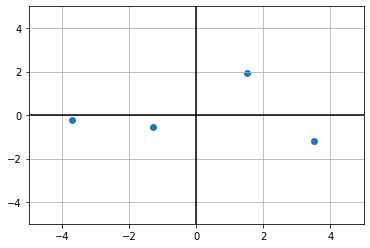

In [31]:
plt.scatter(list(W1),list(W2))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(True, which='both')
plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')


b. déterminons les corrélations entre les variables et les composants

In [32]:
# déterminons l'individu moyen des variables
M = []
for i in range(X.cols):
    sum = 0
    for j in range(X.rows):
        sum += (X.col(i).row(j))[0]
    M.append(sum)
MX = Matrix(M)
MX


Matrix([
[0],
[0],
[0]])

In [33]:
# matrix centrée
sigma = []
for i in range(X.cols):
    s1 = []
    for j in range(X.rows):
        s1.append(X.col(i).row(j)-MX.col(0).row(i))
    sigma.append(s1)

sigma = Matrix(sigma)
sigma

Matrix([
[-2, -1,  2,  1],
[ 3,  1, -1, -3],
[-1,  0, -1,  2]])

In [34]:
# déterminons l'individu moyen des composants
M = []
for i in range(W.cols):
    sum = 0
    for j in range(W.rows):
        sum += (W.col(i).row(j))[0]
    M.append(sum.round(0))
MW = Matrix(M)
MW

Matrix([
[0],
[0]])

In [35]:
# déterminons l'individu ecart-type des variables
M = []
for i in range(X.cols):
    item = []
    sum = 0
    for j in range(X.rows):
        item.append(
            (((X.col(i).row(j))[0])**2)/X.rows
        )
    for j in range(X.rows):
        sum += item[j]
    sum = sqrt(sum)
    M.append(sum.round(2))
EX = Matrix(M)
EX


Matrix([
[1.58],
[2.24],
[1.22]])

In [45]:
# matrix centrée reduit
gamma = []
for i in range(X.cols):
    s1 = []
    for j in range(X.rows):
        print(list(sigma.col(i).row(j))[0])
        print(list(EX.col(0).row(i)))
        s1.append(list(sigma.col(i).row(j))[0] /  list(EX.col(0).row(i)))
    gamma.append(s1)

gamma = Matrix(gamma)
gamma

-2
[1.58]


TypeError: unsupported operand type(s) for /: 'Integer' and 'list'

In [36]:
# déterminons l'individu ecart-type des composantes
M = []
for i in range(W.cols):
    item = []
    sum = 0
    for j in range(W.rows):
        item.append(
            (((W.col(i).row(j))[0])**2)/W.rows
        )
    for j in range(W.rows):
        sum += item[j]
    sum = sqrt(sum)
    M.append(sum.round(2))
EW = Matrix(M)
EW


Matrix([
[2.73],
[1.17]])

In [37]:
# calculer la corrélation entre les variables service, qualite et prix et les composantes w1 et w2

# variables service, qualite et prix et les composantes w1 et w2
GM = []
for k in range(EW.rows): # pour parcourir w1 et w2
    M = []
    for i in range(X.cols): # parcourir toutes les variables
        item = []
        sum = 0
        for j in range(X.rows): # parcourir tous les individus des variables et composants
            item.append(
                (((X.col(i).row(j))[0] - MX.col(0).row(i)[0]) * (W.col(k).row(j)[0] - MW.col(0).row(k)[0]))/X.rows
            ) # sauvegarder la covariance (X,W)
        for j in range(X.rows):
            sum += item[j] # sommer les covariances pour une variable et une composante
        sum = sum/(EX.col(0).row(i)[0]*EW.col(0).row(k)[0]) # diviser par la produit des écart type de la variables et composant courant 
        M.append(sum.round(2))
    GM.append(M)
COR_EW1 = Matrix(GM).transpose()
COR_EW1


Matrix([
[0.88,   0.5],
[-1.0,  0.04],
[0.69, -0.71]])

|Corrélation|W1|W2|
|:---------:|:-:|:-:|
|Service|0.88|0.5|
|Qualité|-1|0.04|
|Prix|0.69|-0.71|

b. Représentons les variables sur le cercle des corrélations dans le plan factoriel (1,2)

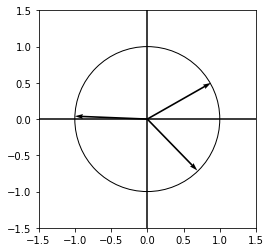

In [38]:
fig, axe = plt.subplots()
if COR_EW1.cols == 2:
    plt.axhline(y=0, color='black')
    plt.axvline(x=0, color='black')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    axe.quiver([int(d) for d in list(zeros(1, COR_EW1.rows))], [int(d) for d in list(zeros(1, COR_EW1.rows))],[float(d) for d in list(COR_EW1.col(0))], [float(d) for d in list(COR_EW1.col(1))], angles='xy', scale_units='xy', scale=1)
    cercle = plt.Circle((0, 0), 1, fill=False)
    axe.set_aspect(1)
    axe.add_artist(cercle)
elif COR_EW1.cols == 3:
    z = list(zeros(100, 1))
    ax = fig.add_subplot(projection='3d')
    z = list(zeros(1, COR_EW1.cols))
    ax.quiver(z, z, z, list(COR_EW1.col(0)),
              list(COR_EW1.col(1)), list(COR_EW1.col(2)))
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_zlim(-1.5, 1.5)



c. Interpretons les résultats


* le fait que "Qualité" soit très proche de l'axe 1 indique qu'il est très bien représenté par cet axe, par contre le fait qu'il soit très éloigné de l'axe deux montre qu'il est très peu représenté par cet axe.
* les varaibles Services et Prix ne sont assez bien représenté par les différents axes car sont equi-distant de ceux-ci.

[ACP Interpretation](https://www.soft-concept.com/surveymag/comment-lire-une-acp.html#:~:text=Elle%20prend%20des%20valeurs%20entre,pas%20%C3%AAtre%20effectu%C3%A9e%20avec%20confiance.)